### Librerías y Carga de Datos

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# Mostrar la salida de Matplotlib en el notebook
%matplotlib inline

In [16]:
# Cargar Dataset
dta = sm.datasets.fair.load_pandas().data

# Agregar columna "affair": 0 si nunca tuvo affairs, 1 de lo contrario (Estas son las etiquetas de clase)
dta['affair'] = (dta.affairs > 0).astype(int)

### Exploración de Datos

In [17]:
print("TODOS LOS DATOS:\n")
dta

TODOS LOS DATOS:



,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [18]:
print("\nAGRUPADO POR FIEL/INFIEL:\n")
dta.groupby('affair').mean()


AGRUPADO POR FIEL/INFIEL:



,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [19]:
print("\nAGRUPADO POR AÑOS DE MATRIMONIO:\n")
dta.groupby('yrs_married').mean()


AGRUPADO POR AÑOS DE MATRIMONIO:



,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs,affair
yrs_married,,,,,,,,,
0.5,4.524324,22.156757,0.048649,2.454054,14.237838,3.302703,3.502703,0.546486,0.043243
2.5,4.239921,23.640364,0.297198,2.312684,14.384956,3.383481,3.614061,0.984877,0.215831
6.0,4.066608,26.439089,1.036810,2.347064,14.454864,3.469763,3.881683,0.741184,0.339176
9.0,3.985050,28.985050,1.649502,2.368771,14.367110,3.393688,4.061462,0.737495,0.421927
13.0,4.038983,32.610169,1.916102,2.457627,14.218644,3.474576,4.100000,0.508149,0.411864
16.5,3.952323,35.135697,2.814181,2.601467,13.710269,3.415648,4.014670,0.484304,0.451100
23.0,3.956843,41.013564,3.281751,2.652281,13.794081,3.511714,4.051788,0.369099,0.425401


### Visualización de los Datos

Distribución de Población...

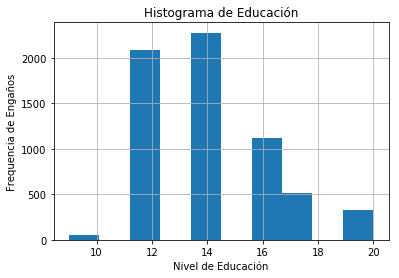

In [22]:
# Histograma de Educación
dta.educ.hist()
plt.title('Histograma de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia (# Personas)')

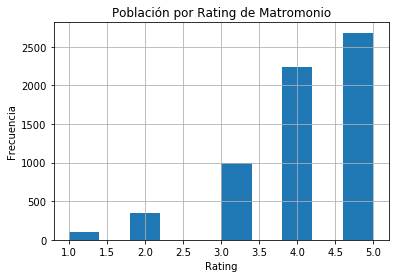

In [24]:
# Histograma del rating del matrimonio
dta.rate_marriage.hist()
plt.title('Población por Rating de Matromonio')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')

Distribución de Engaños...

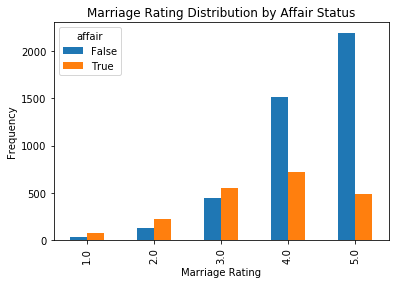

In [26]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Distribución por porcentaje (Stacked Barplots)

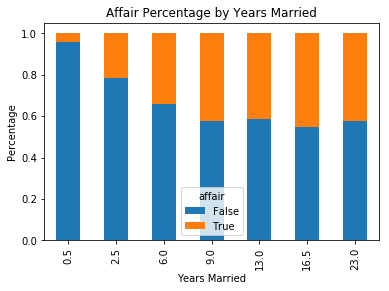

In [28]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

### Preparar Datos para Logistic Regression

Se quiere tratar a las variables occupation y occupation_husb como categóricas, entonces se tienen que convertir a ONE-HOT VECTORS!

In [39]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
# Affair es Y (LABELS) y el resto de columnas incluidos los one-hot vectors son los rasgos X
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
print(X.columns)
X

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,27.0,9.0,0.0,2.0,14.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,22.0,2.5,0.0,2.0,12.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,0.0,1.0,16.0


In [40]:
# Cambiar nombres de Columnas de X (Solo por estética)
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

# Transponer y en un arreglo 1-D horizontal
old_y = y
print(old_y)
y = np.ravel(y)
y

      affair
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
...      ...
6336     0.0
6337     0.0
6338     0.0
6339     0.0
6340     0.0
6341     0.0
6342     0.0
6343     0.0
6344     0.0
6345     0.0
6346     0.0
6347     0.0
6348     0.0
6349     0.0
6350     0.0
6351     0.0
6352     0.0
6353     0.0
6354     0.0
6355     0.0
6356     0.0
6357     0.0
6358     0.0
6359     0.0
6360     0.0
6361     0.0
6362     0.0
6363     0.0
6364     0.0
6365     0.0

[6366 rows x 1 columns]


array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

### Logistic Regression

In [41]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.72588752748978946

El modelo dice que 72% de exactitud (accuracy), pero si se checa la proporción del error (a continuación), vemos que el 32% de las mujeres tuvieron una affair, con lo cual si hacemos un modelo que siempre diga "no" tendremos una exactitud del 68% ¡y sin haber entrenado nada! Esto quiere decir que hay que mejorar el modelo...

In [42]:
# what percentage had affairs?
y.mean()

0.32249450204209867

In [46]:
# Primero hay que analizar los coeficientes o pesos (Weights) de nuestro modelo!
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.48983596947]
1,occ_2,[0.188066529506]
2,occ_3,[0.498948106888]
3,occ_4,[0.250668538162]
4,occ_5,[0.839008182281]
5,occ_6,[0.833908524592]
6,occ_husb_2,[0.190635862523]
7,occ_husb_3,[0.29783259112]
8,occ_husb_4,[0.161408768431]
9,occ_husb_5,[0.187770784705]


En realidad tenemos que dividir los datos al menos en entrenamiento y prueba. Después se entrena el modelo, y una vez que termina, se hacen predicciones usando los conjuntos de prueba.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

# predict class labels for the test set
y_predicted = model2.predict(X_test)
print(predicted)

# generate class probabilities (Por cada registro en el test predecir la probabilidad de pertenecer a clase 0 y 1)
x_probs = model2.predict_proba(X_test)
print(probs)



[ 1.  0.  0. ...,  0.  0.  0.]
[[ 0.35146335  0.64853665]
 [ 0.90955085  0.09044915]
 [ 0.72567333  0.27432667]
 ..., 
 [ 0.55727382  0.44272618]
 [ 0.81207051  0.18792949]
 [ 0.74734605  0.25265395]]


### Evaluación

In [55]:
# Comparar las salidas del modelo con la salidas esperadas (Accuracy y ROC) TODO: Graficar curva ROC
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.roc_auc_score(y_test, x_probs[:, 1]))

0.729842931937
0.745950606951


In [59]:
# Imprimir la confusion Matrix [[TN,FP],
#                               [FN,TP]]
print(metrics.confusion_matrix(y_test, predicted))
print("\n\n Reporte de Clasificación: \n")
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]


 Reporte de Clasificación: 

             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [60]:
# Evaluar usando K-fold cross-validation: En este caso es 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.72100313  0.70219436  0.73824451  0.70597484  0.70597484  0.72955975
  0.7327044   0.70440252  0.75157233  0.75      ]
0.724163068551


### Uso del modelo para predicción

Suponiendo que se tiene una mujer con los siguientes rasgos: tiene 25años, es maestra graduada de la universidad, tiene 3 años de casada, tiene 1 hijo, es fuertemente religiosa, su matrimonio es normal (fair), y su esposo es un granjero. Armamos el patrón con los rasgos que pide nuestra estuctura de datos (dataset) y lo metemos al modelo para que prediga 

¿Cuál es la probabilidad de que esta mujer tenga una aventura?


In [67]:
result = model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,16]]))
print("Probabilidad = {}%".format(int(round(result[0][1]*100))))

Probabilidad = 23%
